# Implement Cis: 

Let $X_1, X_2, X_3,...., X_n$ be i.i.d. and $\textbf{E}[X_i] = \mu$     


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Experiments on Beta Distribution with $\alpha=5, \beta=1$

In [3]:
N = [x for x in range(100,4000,400)]
delta = 0.05
alpha = 5
beta  = 1
mean  = alpha/(alpha+beta)
print(mean)
a = 0
b = 1

0.8333333333333334


In [4]:
def sample_from_beta_distribution(n, alpha, beta):
    X = np.random.beta(alpha, beta, n)
    return X
def sample_from_uniform_distribution(n,alpha,beta):
    X=np.random.uniform(alpha,beta,n)
    return X

def get_stddev(X):
    return np.std(X, ddof=1)
def get_var(X):
    return np.var(X, ddof=1)


In [5]:
def get_sample_stats(list_of_n):
    sample_means = []
    sample_std   = []
    for n in list_of_n:
        X = sample_from_beta_distribution(n, alpha, beta)
        sample_means.append(np.mean(X))
        sample_std.append(get_stddev(X))
    return sample_means, sample_std


# Hoeffding
$$Pr(X_i \epsilon [a,b]) = 1$$
$$Pr \left( \mu \ge \frac{1}{n} \sum_{i=1}^N X_i - (b-a)\sqrt  \frac{\ln\frac{1}{\delta} }{2n}  \right) \ge 1-\delta$$
$$Pr \left( \mu \le \frac{1}{n} \sum_{i=1}^N X_i + (b-a)\sqrt  \frac{\ln\frac{1}{\delta} }{2n}  \right) \ge 1-\delta$$

In [6]:
sample_means,_=get_sample_stats(N)
bounds = [(b-a)*(np.sqrt(np.log(1/delta) / (2*n))) for n in N]
upper_bounds = np.array(sample_means) + np.array(bounds)
lower_bounds = np.array(sample_means) - np.array(bounds)

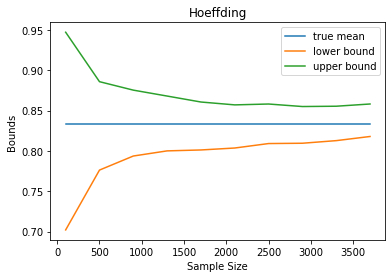

In [7]:
plt.plot(N,[mean]*10, label='true mean')
plt.plot(N,lower_bounds, label='lower bound')
plt.plot(N,upper_bounds, label= 'upper bound')
plt.title('Hoeffding')
plt.xlabel('Sample Size')
plt.ylabel('Bounds')
plt.legend()
plt.show()

# ttest
$$\bar{X} = \sum_{i=1}^N X_i $$ and $\bar{X}$ is normally distributed
$$Pr \left( \mu \ge \frac{1}{n} \sum_{i=1}^N X_i -   \frac{\hat{\sigma} * t_{1-\delta, n-1}}{\sqrt{n}}  \right) \ge 1-\delta$$
$$Pr \left( \mu \le \frac{1}{n} \sum_{i=1}^N X_i +  \frac{\hat{\sigma} * t_{1-\delta, n-1}}{\sqrt{n}}  \right) \ge 1-\delta$$

In [8]:
def tinv(p, nu):
    return t.ppf(p, nu)

sample_means, sample_std = get_sample_stats(N)
bounds = [(sample_std[i]*tinv(1-delta, n-1))/np.sqrt(n) for i,n in enumerate(N)]
upper_bounds = np.array(sample_means) + np.array(bounds)
lower_bounds = np.array(sample_means) - np.array(bounds)

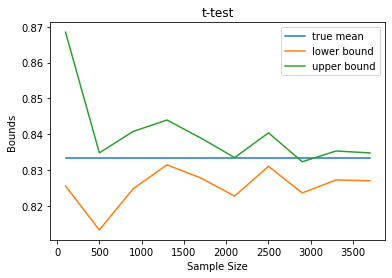

In [9]:
plt.plot(N,[mean]*10, label='true mean')
plt.plot(N,lower_bounds, label='lower bound')
plt.plot(N,upper_bounds, label= 'upper bound')
plt.title('t-test')
plt.xlabel('Sample Size')
plt.ylabel('Bounds')
plt.legend()
plt.show()

# Anderson

$$Pr\left(\mu \ge Z_{n} - \sum_{i=0}^{n-1}(Z_{i+1} - Z_{i}) min\left(1,  \frac{i}{n}+ \sqrt{\frac{\log(2/\delta)}{2n}} \right) \right)$$

$$Pr\left(\mu \ge 1 - \sum_{i=1}^{n}(Z_{i+1} - Z_{i}) max\left(0,  \frac{i}{n}- \sqrt{\frac{\log(2/\delta)}{2n}} \right) \right)$$

In [10]:
lb = []
ub = []
for n in N:
    X = sample_from_beta_distribution(n, alpha, beta)
    X = np.append(X,0)
    X.sort()
    lb_n = [(X[i+1]-X[i])*min(1, (i/n)+np.sqrt(np.log(2/delta)/(2*n))) for i in range(0,int(n))]
    X = np.append(X,1)
    ub_n = [(X[i+1]-X[i])*max(0, (i/n)-np.sqrt(np.log(2/delta)/(2*n))) for i in range(1,int(n+1))]
    lb.append(max(X)-sum(lb_n))
    ub.append(1-sum(ub_n))

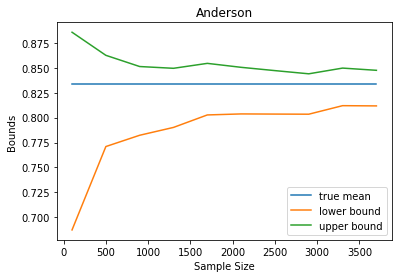

In [11]:
plt.plot(N,[mean]*10, label='true mean')
plt.plot(N,lb, label='lower bound')
plt.plot(N,ub, label= 'upper bound')
plt.title('Anderson')
plt.xlabel('Sample Size')
plt.ylabel('Bounds')
plt.legend()
plt.show()

MPeB
$$Pr(\mu \ge \frac{1}{N}\sum_{i=1}^N X_i - \frac{7(b-a)\ln(2/\delta)}{3(n-1)} - \sqrt\frac{2\ln(2/\delta)}{n} \hat{\sigma}^{2}  )$$

In [71]:
sample_means,sample_std=get_sample_stats(N)
bounds = [(7*(b-a)*(np.log(2/delta)))/(3*(n-1))+(np.sqrt((2*np.log(2/delta)) /n )*sample_std[i]) for i,n in enumerate(N)]
upper_bounds = np.array(sample_means) + np.array(bounds)
lower_bounds = np.array(sample_means) - np.array(bounds)

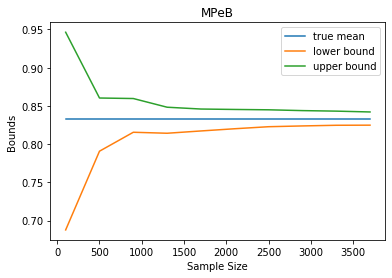

In [72]:
plt.plot(N,[mean]*10, label='true mean')
plt.plot(N,lower_bounds, label='lower bound')
plt.plot(N,upper_bounds, label= 'upper bound')
plt.title('MPeB')
plt.xlabel('Sample Size')
plt.ylabel('Bounds')
plt.legend()
plt.show()
print()

Phil's AAAI 2015, Later MPeB

$$ Pr\left(\mu \ge \left( \sum_{i=1}^{n} \frac{1}{c_i} \right)^{-1} \sum_{i=1}^{n} \frac{Y_i}{c_i} -  \left( \sum_{i=1}^{n} \frac{1}{c_i} \right)^{-1} \frac{7n\ln(2/\delta)}{3(n-1)} - \left( \sum_{i=1}^{n} \frac{1}{c_i} \right)^{-1} \sqrt\frac{\ln(2/\delta) \sum_{i,j=1}^{n} \left(\frac{Y_i}{c_i} - \frac{Y_j}{c_j} \right)^2 }{n-1}  \right) \ge 1 - \delta$$

$$Y_i=min(X_i,c_i)$$
$$c_i=b$$ for beta distribution
$$c_i=c$$ for pareto distribution

In [98]:
sample_means,sample_std=get_sample_stats(N)
UB = []
LB = []
for n in N:
    
    X = sample_from_beta_distribution(n, alpha, beta)
    c = [b]*n
    
    c_inv_mean_inv = (np.sum([1/i for i in c]))**(-1)
    Y = [min(X[i], c[i]) for i in range(n)]
    
    ratio_sum = np.sum([Y[i]/c[i] for i in range(n)])
    ratio_std = np.std([Y[i]/c[i] for i in range(n)],ddof=1)
    empirical_mean = c_inv_mean_inv * ratio_sum
    
    bound = c_inv_mean_inv * ((7*n*np.log(2/delta))/(3*(n-1))) + c_inv_mean_inv * np.sqrt((np.log(2/delta)))*ratio_std
    UB.append(c_inv_mean_inv*ratio_sum + bound)
    LB.append(c_inv_mean_inv*ratio_sum - bound)

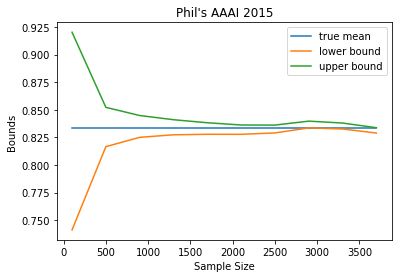

0.8308074673372606 0.8292180307380599


In [99]:
plt.plot(N,[mean]*10, label='true mean')
plt.plot(N,LB, label='lower bound')
plt.plot(N,UB, label= 'upper bound')
plt.title('Phil\'s AAAI 2015')
plt.xlabel('Sample Size')
plt.ylabel('Bounds')
plt.legend()
plt.show()
print(max(lb), min(ub))

Bca

LMT

Hoeffding, MPeB, Anderson, LMT, BCa, percentile bootstrap, t-test

In [77]:
import scipy.stats as ss

def plot_beta(x_range, a, b, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the f distribution function for a given x range, a and b
    If mu and sigma are not provided, standard beta is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = ss.beta.cdf(x, a, b)
    else:
        y = ss.beta.pdf(x, a, b)
    plt.plot(x, y, **kwargs)
x = np.linspace(0, 1, 5000)
y = np.linspace(mean,mean,5000)
# plt.plot(x,y, label='mean')
plot_beta(x, 5, 1, 0, 1, color='red', lw=2, ls='-', alpha=0.5, label='pdf')
# plot_beta(x, 5, 1, 0, 1, cdf=True, color='blue', lw=2, ls='-', alpha=0.5, label='cdf')
plt.legend();
title = 'Beta Distribution with alpha=' + str(alpha) + 'and beta='+ str(beta)
plt.title(title)

Text(0.5, 1.0, 'Beta Distribution with alpha=5and beta=1')

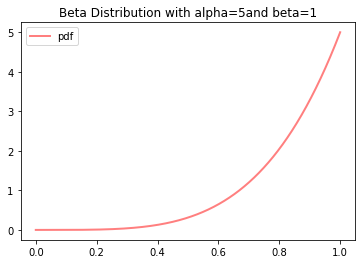

In [78]:
plt.show()

In [79]:
# from scipy.stats import beta
# dist = beta(5, 1)
# plt.plot(x, dist.pdf(x), c='black',
#              label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

In [80]:
# plt.show()

In [81]:
import scikits.bootstrap as boot
import numpy as np
lb = []
ub = []
for n in N:
    temp=boot.ci(sample_from_beta_distribution(n, alpha, beta), np.average)
    lb.append(temp[0])
    ub.append(temp[1])

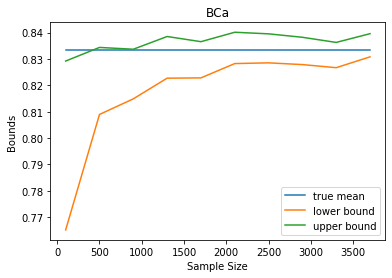

In [100]:
plt.plot(N,[mean]*10, label='true mean')
plt.plot(N,lb, label='lower bound')
plt.plot(N,ub, label= 'upper bound')
plt.title('BCa')
plt.xlabel('Sample Size')
plt.ylabel('Bounds')
plt.legend()
plt.show()

In [142]:
def ttest(n):
    X=np.random.beta(alpha,beta,n)
    sample_mean = np.mean(X)
    sample_std = np.std(X, ddof=1)
    bound = (sample_std*tinv(1-delta, n-1))/np.sqrt(n)
    ub = sample_mean + bound
    lb = sample_mean - bound
    return lb, ub
def BCa(n):
    temp=boot.ci(sample_from_beta_distribution(n, alpha, beta), np.average)
    return temp[0], temp[1]
def Hoeffding(n):
    X=np.random.beta(alpha,beta,n)
    sample_mean = np.mean(X)
    bound = (b-a)*(np.sqrt(np.log(1/delta) / (2*n)))
    ub = sample_mean + bound
    lb = sample_mean - bound
    return lb, ub
def MPeB(n):
    X=np.random.beta(alpha,beta,n)
    sample_mean = np.mean(X)
    sample_std = np.std(X, ddof=1)
    bound = (7*(b-a)*(np.log(2/delta)))/(3*(n-1))+(np.sqrt((2*np.log(2/delta)) /n )*sample_std) 
    ub = sample_mean + bound
    lb = sample_mean - bound
    return lb, ub
def PhilsAAAI(n):
    X = sample_from_beta_distribution(n, alpha, beta)
    c = [b]*n
    
    c_inv_mean_inv = (np.sum([1/i for i in c]))**(-1)
    Y = [min(X[i], c[i]) for i in range(n)]
    
    ratio_sum = np.sum([Y[i]/c[i] for i in range(n)])
    ratio_std = np.std([Y[i]/c[i] for i in range(n)],ddof=1)
    empirical_mean = c_inv_mean_inv * ratio_sum
    
    bound = c_inv_mean_inv * ((7*n*np.log(2/delta))/(3*(n-1))) + c_inv_mean_inv * np.sqrt((np.log(2/delta)))*ratio_std
    ub = (c_inv_mean_inv*ratio_sum + bound)
    lb = (c_inv_mean_inv*ratio_sum - bound)
    return lb, ub

In [136]:
gx=N
gy=[]
for n in N:
    temp_l = []
    temp_u = []
    for _ in range(100):
        lb, ub = ttest(n)
        temp_l.append(mean<lb)
        temp_u.append(mean>ub)
    failures = np.sum(np.array(temp_l) | np.array(temp_u))
    gy.append(failures/100)
        

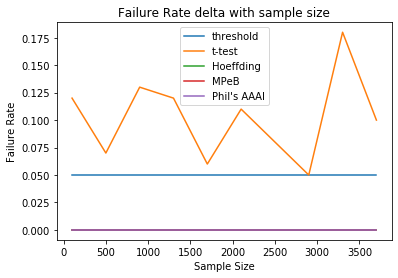

In [146]:
plt.plot(N,[0.05]*10, label='threshold')
plt.plot(N,gy, label='t-test')
plt.plot(N,gh, label= 'Hoeffding')
plt.plot(N,gb, label= 'MPeB')
plt.plot(N,gb, label= 'Phil\'s AAAI')
plt.title('Failure Rate delta with sample size')
plt.xlabel('Sample Size')
plt.ylabel('Failure Rate')
plt.legend()
plt.show()

In [129]:
gx=N
gb=[]
for n in N:
    temp_l = []
    temp_u = []
    for _ in range(100):
        lb, ub = MPeB(n)
        temp_l.append(mean<lb)
        temp_u.append(mean>ub)
    failures = np.sum(np.array(temp_l) | np.array(temp_u))
    gb.append(failures/100)

In [120]:
gx=N
gh=[]
for n in N:
    temp_l = []
    temp_u = []
    for _ in range(100):
        lb, ub = Hoeffding(n)
        temp_l.append(mean<lb)
        temp_u.append(mean>ub)
    failures = np.sum(np.array(temp_l) | np.array(temp_u))
    gh.append(failures/100)

In [143]:
gx=N
gp=[]
for n in N:
    temp_l = []
    temp_u = []
    for _ in range(100):
        lb, ub = PhilsAAAI(n)
        temp_l.append(mean<lb)
        temp_u.append(mean>ub)
    failures = np.sum(np.array(temp_l) | np.array(temp_u))
    gp.append(failures/100)